# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


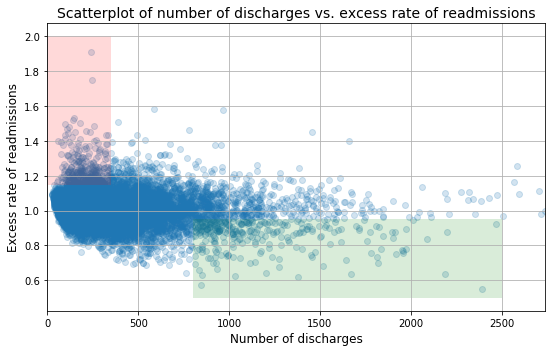

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Critique of Preliminary Report

I do not agree with the above analysis.  Both the initial observations on the plot and the statistics are based on an arbitrary splitting of the data.  This can introduce significant bias into an analysis because an investigator looking for results can inadvertently select ranges that support a conclusion, correct or not.

##### Misleading Information
For example, this analysis highlights certain areas of the scatterplot by using red and green squares.
* The red square represents all hospitals with no more than 350 discharges and an excess rate of readmission greater than 1.15.
* The green square represents all hospitals with no fewer than 800 discharges and an excess rate of readmission lower than .9.

While these are interesting areas of the scatterplot, it can be misleading to focus primarily on these area for a number of reasons:
* We are focusing on a small subset of the data

In [5]:
#Shorten variable name
df = clean_hospital_read_df

red = len(df.loc[(df['Number of Discharges']<=350) & (df['Excess Readmission Ratio']>=1.15),:]) / len(df)
green = len(df.loc[(df['Number of Discharges']>=800) & (df['Excess Readmission Ratio']<=.9),:]) / len(df)

print('Red square is {}% of the data\nGreen square is {}% of the data'.format(round(red*100,2), round(green*100,2)))

Red square is 3.03% of the data
Green square is 1.62% of the data


* Despite visually appearing substantially different, the percentage of high excess readmission rates above 1.15 are also surprisingly similar when you take into account the number of observations in each area.

In [6]:
red = len(df.loc[(df['Number of Discharges']<=350) & (df['Excess Readmission Ratio']>1.15),:]) / len(df.loc[df['Number of Discharges']<=350])
green = len(df.loc[(df['Number of Discharges']>=800) & (df['Excess Readmission Ratio']>1.15),:]) / len(df.loc[df['Number of Discharges']>=800])

print('Excess Readmission Ratio > 1.15\nRed square: {}% of observations\nGreen Square: {}% of observations'.format(round(red*100,2), round(green*100,2)))

Excess Readmission Ratio > 1.15
Red square: 4.94% of observations
Green Square: 5.32% of observations


Although I disagree with their selection of portions of the data, I would expect a consistent analysis of those subsets. However, their statistics are calculated on substantially different subsets of the data (discharges less than 100 and greater than 1000).  When I investigated the same statistics for their original subset, I found there was a substantially smaller than difference than the results they found.

In [7]:
red_mean = np.nanmean(df.loc[df['Number of Discharges']<=350,'Excess Readmission Ratio'])
green_mean = np.nanmean(df.loc[df['Number of Discharges']<=800,'Excess Readmission Ratio'])

print('Original subset\nMean Ratio - Red: {}\nMean Ratio - Green: {}'.format(round(red_mean,3), round(green_mean, 3)))

Original subset
Mean Ratio - Red: 1.013
Mean Ratio - Green: 1.009


In [8]:
red_perc = len(df.loc[(df['Number of Discharges']<=350) & (df['Excess Readmission Ratio']>1),:]) / len(df.loc[df['Number of Discharges']<=350])
green_perc = len(df.loc[(df['Number of Discharges']>=800) & (df['Excess Readmission Ratio']>1),:]) / len(df.loc[df['Number of Discharges']>=800])

print('Original subset\n%>1 - Red: {}\n%>1 - Green: {}'.format(round(red_perc*100,2), round(green_perc*100, 2)))

Original subset
%>1 - Red: 52.68
%>1 - Green: 47.4


In their conclusion, they state that there is a significant correlation between hospital capacity (number of discharges) and readmission rates.  While the correlation of -0.10 between the two variables does suggest that there could be a negative relationship, it is extremely weak.

In [9]:
corr = df.corr()
corr.loc['Number of Discharges', 'Excess Readmission Ratio']

-0.09739794351079363

##### Recommendation

Because it appears they are trying to establish whether there is a relationship between hospital capacity (the number of discharges) and readmission rates, a hypothesis test for slope would be most appropriate to determine if there is any statistical evidence to suggest the slope is not 0 (no relationship).  

The resulting p-value is essentially 0 suggesting that there is statistically significant evidence that the slope is not 0 and thus suggests a relationship between the number of discharges and the excess readmission ratio.  

However, this does not mean that the findings are practically significant. Our model predicts that the excess readmission rate will fall about 0.0236 to 0.0344 for every 1000 increase in the number of discharges.  Considering that the vast majority of the hospitals' discharges are within 1,000 to 1,500, this proposed relationship is statistically significant, but practically miniscule. 

In [64]:
import statsmodels.api as sm
import scipy.stats as st

x=df['Number of Discharges']
x=sm.add_constant(x)
y=df['Excess Readmission Ratio']

model = sm.OLS(y, x, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Excess Readmission Ratio   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     110.1
Date:                      Tue, 09 Oct 2018   Prob (F-statistic):           1.22e-25
Time:                              14:06:37   Log-Likelihood:                 11178.
No. Observations:                     11497   AIC:                        -2.235e+04
Df Residuals:                         11495   BIC:                        -2.234e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.0181      0.001    769.664      0.000       1.016       1.021
Number of Discharges -2.901e-05   2.76e-06    -10.492      0.000   -3.44e-05   -2.36e-05
==============================================================================
Omnibus:                     1666.940   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6839.197
Skew:                           0.671   Prob(JB):                         0.00
Kurtosis:                       6.532   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I agree with the preliminary analysis that a scatterplot is the most effective way to view large amounts of data.  However, I think there are some small manipulations of their original plot that could improve it.

First, I removed the colored squares as I felt that they drew the eye to misleading sections of the data.  Then I modified the limits of the y-axis so that an excess rate of readmissions would be centered in the middle.  These 2 simple things make for a less biased view of the relationship between the number of discharges and the excess rate of readmissions.  I also added in the least squares regression line to help demonstrate that while there appears to be a negative relationship, it is practically very small and weak.

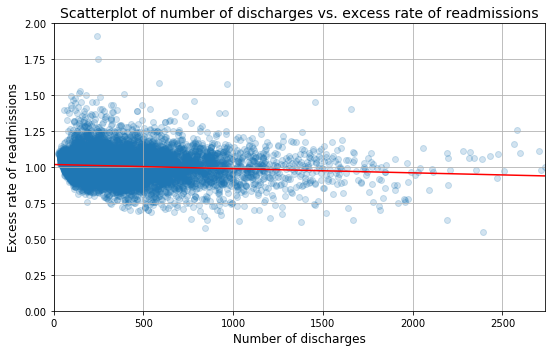

In [83]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_ylim([0,2])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

#Plot least squares regression line
x_line = np.array([0, 3000])
y_int, slope = model.params
ax.plot(x_line, slope*x_line + y_int, color='red')

ax.grid(True)
fig.tight_layout()

I also thought it might be useful to use rolling means to filter out some of the variability to give a better idea of the overall relationship.

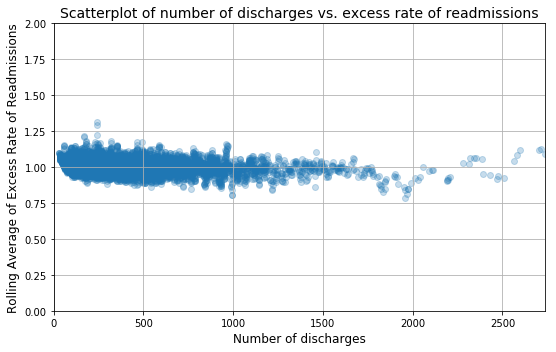

In [84]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x=df['Number of Discharges'][81:-3]
rolling_mean=df['Excess Readmission Ratio'].rolling(5).mean()[81:-3]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, rolling_mean, alpha=0.25)

ax.set_xlim([0, max(x)])
ax.set_ylim([0, 2])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Rolling Average of Excess Rate of Readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()